# Задание 1.1

$$X_1, X_2, ... X_n \sim U[-\theta, \theta]$$

### Воспользуемся методом моментов для оценки $\theta^2$.

У нас одна неизвестная, возьмём $g(x) = x^2$

$$E X^2 = \frac{\theta^2}{3}$$

$$\overline{X^2} = \frac{\hat{\theta}^2}{3}$$

$$\hat{\theta}^2 = 3 \overline{X^2}$$

### Посчитаем смещение

$$bias \space \hat{\theta}^2 = E \hat{\theta}^2 - E \theta^2$$

$$E \hat{\theta}^2 = E \space 3 \overline{X^2} = 3 E X^2 = \theta^2 $$

$$bias \space \hat{\theta}^2 = 0$$
Следовательно оценка несмещённая

### Посчитаем дисперсию

$$S_*^2 = Var \space \hat{\theta}^2 = E \hat{\theta}^4 - (E \hat{\theta}^2)^2$$

$$E \hat{\theta}^4 = 9 E (\overline(X^2))^2 = 9 E (\frac{1}{n} \sum_{i=1}^n X_i^2)^2
= 9 (\frac{E X^4}{n} + \frac{n - 1}{n} (E X^2)^2) = 9 (\frac{\theta^4}{5n} + \frac{(n - 1)\theta^4}{9n}) $$

$$S_*^2 = 9 (\frac{\theta^4}{5n} + \frac{(n - 1)\theta^4}{9n}) - \theta^4$$

### Посчитаем среднеквадратическую ошибку

Т.к. оценка несмещённая

$$MSE \space \theta^2 = Var \space \theta^2 $$


Из метода моментов и состоятельности и асимтотической нормальности второго момента следует, что оценка состоятельна и асимптотически нормальна.



In [1]:
from scipy import stats
import matplotlib.pyplot as plt
import math

In [2]:
SAMPLE_SIZES = [1, 10, 100, 1000, 10000, 100000]
M = 20

In [3]:
theta = 10
rnd = stats.uniform(-theta, theta * 2)

In [4]:
sample = [[[rnd.rvs() for _ in range(sz)] for _ in range(M)] for sz in SAMPLE_SIZES]


In [5]:
def estimate_theta(sample):
    return 3 * sum(map(lambda x: x ** 2, sample)) / len(sample)

In [6]:
estimated = [[estimate_theta(sample[i][j]) - theta**2 for j in range(M)] for i in range(len(SAMPLE_SIZES))]

In [7]:
print("N\t\t\ttheta_hat")
for i in range(len(SAMPLE_SIZES)):
    print(f"{SAMPLE_SIZES[i]}\t\t\t{estimate_theta(sample[i][0])}")

N			theta_hat
1			4.25370487517914
10			78.20735613802151
100			83.92383701111902
1000			99.10780229461496
10000			99.85534246246755
100000			100.2332732854163


Случайная величина - $(\hat{\theta}^2 - \theta^2)$ рассчитанная для фиксированного `N`. Соотвественно объем выборки `M`.

Посчитаем выборочные характеристики: среднее, дисперсия, медиана, минимум, максимум, количество оценок, которые отличаются от теортического параметра не более чем на заданный порог

Порогом для совпадение поставим отличие не более чем на 0.005


In [11]:
def sample_mean(sample):
    return sum(sample) / len(sample)

def sample_variance(sample):
    m = sample_mean(sample)
    return sum(map(lambda x: (x - m) ** 2, sample)) / len(sample)

def sample_median(sample):
    s = sample.copy()
    s.sort()
    return s[int(len(s) / 2)]

def mse(sample):
    return math.sqrt(sample_variance(sample))

lim = 0.05

def sample_cnt_good(sample):
    return len(tuple(filter(lambda x: abs(x) < lim , sample)))

In [12]:
def process_stats(sample, N):
    print(f"=================== N={N} ===================")
    plt.plot(sample)
    mn = min(min(sample) - 1, -1)
    mx = max(max(sample) + 1, 1)
    plt.ylim(mn, mx)
    plt.show()

    def print_stat(name, stat):
        print(f"{name}\t\t{stat(sample)}")

    print_stat("Mean", sample_mean)
    print_stat("Variance", sample_variance)
    print_stat("Median", sample_median)
    print_stat("Max", max)
    print_stat("Min", min)
    print_stat("MSE", mse)
    print_stat("Good", sample_cnt_good)



=================== N=1 ===================


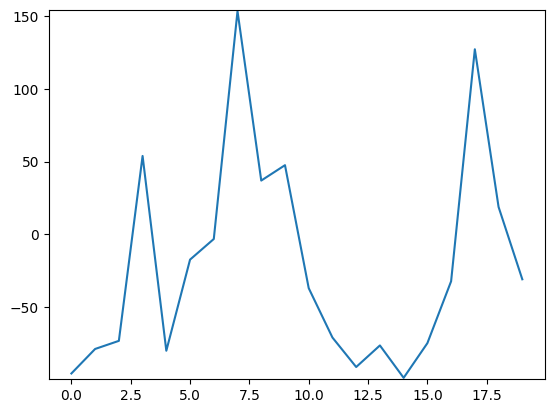

Mean		-21.167748438981395
Variance		5158.499575962962
Median		-32.337811286236814
Max		153.54582437344712
Min		-98.74256932797088
MSE		71.82269541003708
Good		0
=================== N=10 ===================


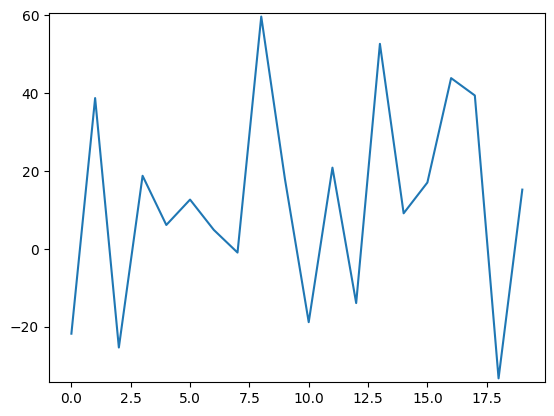

Mean		12.14436301520204
Variance		653.8389199121938
Median		15.226017574363524
Max		59.68601935762777
Min		-33.27711526139929
MSE		25.57027414620723
Good		0
=================== N=100 ===================


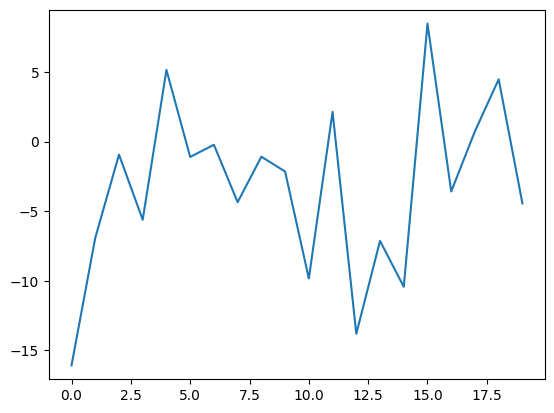

Mean		-3.337286291823321
Variance		37.26356340688296
Median		-2.1534827675561417
Max		8.47478212129053
Min		-16.07616298888098
MSE		6.104388864324009
Good		0
=================== N=1000 ===================


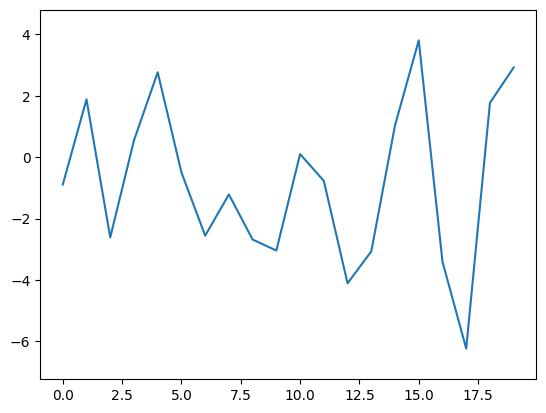

Mean		-0.8123100883767294
Variance		6.7524057791044285
Median		-0.7715683451723123
Max		3.8023325865713957
Min		-6.230802137108583
MSE		2.5985391625112038
Good		0
=================== N=10000 ===================


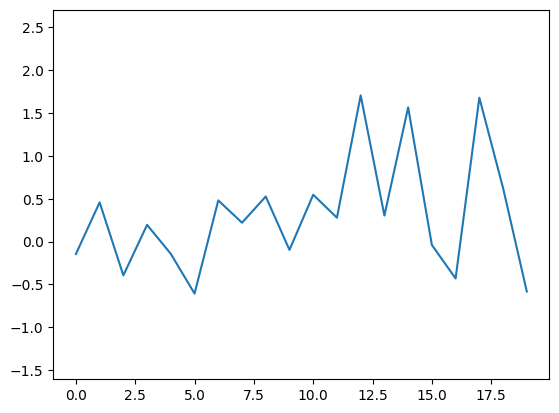

Mean		0.3079584420318312
Variance		0.45282016208866605
Median		0.2794137943448334
Max		1.7067080176335736
Min		-0.6059335616029955
MSE		0.6729191348807567
Good		1
=================== N=100000 ===================


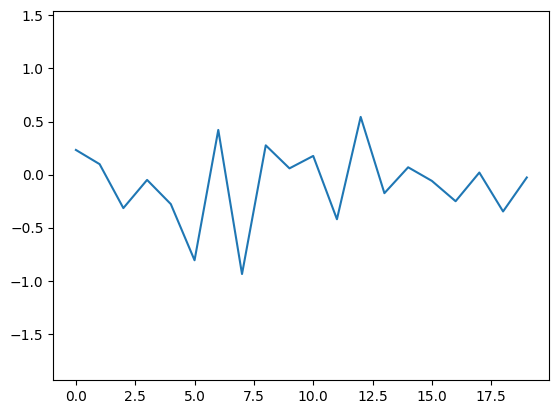

Mean		-0.08751499262351956
Variance		0.12971695263616184
Median		-0.025977195767183048
Max		0.5442558642652955
Min		-0.9351443420322454
MSE		0.3601623975877574
Good		3


In [13]:
for i in range(len(SAMPLE_SIZES)):
    process_stats(estimated[i], SAMPLE_SIZES[i])